# PYTORCH study

## Day 2
***

파이토치로 선형 회귀 모델 구현해보기.

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

y = 1 + 2x<sub>1</sub> + 3x<sub>2</sub>라는 식이 있다고 해보겠습니다.

In [ ]:
w_t = torch.Tensor([1, 2, 3]) # 계수

In [ ]:
X = torch.cat([torch.ones(100, 1), torch.randn(100, 2)],1) # 절편 1, x1, x2 데이터 생성

In [ ]:
X[:5] # 절편, x1, x2 값 상위 5개 목록 출력

tensor([[ 1.0000, -1.4944, -0.6374],
        [ 1.0000, -0.1715,  0.0435],
        [ 1.0000,  0.0371,  0.0339],
        [ 1.0000, -0.5014, -0.3673],
        [ 1.0000, -0.1495,  0.2292]])

In [ ]:
y = torch.mv(X, w_t) + torch.randn(100) * .5 # 행렬과 벡터 내적 

In [ ]:
w = torch.randn(3, requires_grad = True) # 기울기 경사하강법 사용

In [ ]:
lr = .1

In [ ]:
losses = []

for epoc in range(100) :
  w.grad = None

  y_pred = torch.mv(X, w)

  loss = torch.mean((y - y_pred) ** 2)
  loss.backward()

  w.data = w.data - lr * w.grad.data

  losses.append(loss.item())

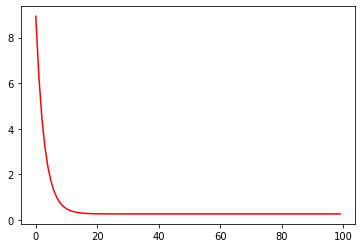

In [ ]:
plt.plot(losses, color = 'red')
plt.show()

In [ ]:
w.data

tensor([0.9564, 2.0522, 2.9309])

실제값인 1, 2, 3과 매우 근사한것을 알 수 있다.

In [ ]:
w_t

tensor([1., 2., 3.])

#### 쉽게 구현할 수 있는 모듈 사용

In [ ]:
from torch import nn, optim

In [ ]:
net = nn.Linear(in_features = 3, out_features = 1, bias = False) # input 3 / output 1 / 절편 x

In [ ]:
opt = optim.SGD(net.parameters(), lr = .1)

In [ ]:
loss_f = nn.MSELoss() # loss를 MSE 사용

In [ ]:
losses = []

for e in range(100) :
  opt.zero_grad()

  y_pred = net(X)

  loss = loss_f(y_pred.view_as(y), y)

  loss.backward()

  opt.step()

  losses.append(loss.item())

In [ ]:
list(net.parameters())

[Parameter containing:
 tensor([[0.9564, 2.0522, 2.9309]], requires_grad=True)]

#### 로지스틱 회귀

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

#### 2개의 label만 사용하므로 전체 150개 데이터 중 100개만 사용

In [ ]:
X = iris.data[: 100]
y = iris.target[: 100]

In [ ]:
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

In [ ]:
net = nn.Linear(4, 1)

loss_f = nn.BCEWithLogitsLoss() # 크로스엔트로피

opt = optim.SGD(net.parameters(), lr = 0.2)

In [ ]:
losses = []

for e in range(100) :
  opt.zero_grad()

  y_pred = net(X)

  loss = loss_f(y_pred.view_as(y), y)
  loss.backward()

  opt.step()

  losses.append(loss.item())

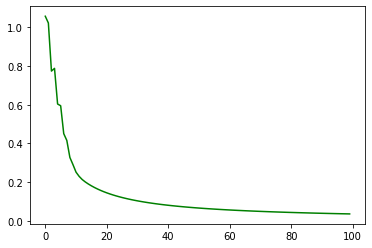

In [ ]:
plt.plot(losses, color = 'green')
plt.show()

In [ ]:
result = net(X)

prob = nn.functional.sigmoid(result)

y_pred = prob  > .5

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [ ]:
(y.byte() == y_pred.view_as(y)).sum().item()

100

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
df = load_digits()

In [ ]:
X = df.data
y = df.target

In [ ]:
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.int64)

In [ ]:
net = nn.Linear(X.size()[1], 10)

In [ ]:
loss_f = nn.CrossEntropyLoss()
opt = optim.SGD(net.parameters(), lr = .01)

In [ ]:
losses = []
for e in range(100) :
  opt.zero_grad()

  y_pred = net(X)

  loss = loss_f(y_pred, y)
  loss.backward()

  opt.step()

  losses.append(loss.item())

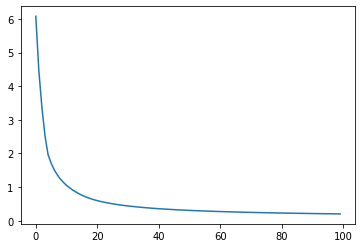

In [ ]:
plt.plot(losses)

In [ ]:
_, y_pred = torch.max(net(X), 1)

In [ ]:
(y_pred == y).sum().item() / len(y)

0.9460211463550362